### Importing the basic libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import *
from sklearn.preprocessing import *
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [2]:
#!pip install imbalanced-learn

In [3]:
#oversample = SMOTE()
#!pip install numpy 
#!pip install scipy

In [4]:
balls = pd.read_csv('ball-by-ball.csv') 
matches = pd.read_csv('IPL Matches.csv')

### Basic Data Interpretation

In [5]:
balls.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [6]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [7]:
balls.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [8]:
matches.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [9]:
balls.dtypes

id                   int64
inning               int64
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
batsman_runs         int64
extra_runs           int64
total_runs           int64
non_boundary         int64
is_wicket            int64
dismissal_kind      object
player_dismissed    object
fielder             object
extras_type         object
batting_team        object
bowling_team        object
dtype: object

In [10]:
matches.dtypes

id                   int64
city                object
date                object
player_of_match     object
venue               object
neutral_venue        int64
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
eliminator          object
method              object
umpire1             object
umpire2             object
dtype: object

In [11]:
balls.isna().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [12]:
matches.isna().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [13]:
balls[balls['bowling_team'].isnull()]

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
57048,501265,1,0,1,NV Ojha,DA Warner,AC Thomas,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,NaN
57049,501265,1,0,2,DA Warner,NV Ojha,AC Thomas,0,1,1,0,0,NaN,NaN,NaN,legbyes,Delhi Daredevils,NaN
57050,501265,1,1,1,DA Warner,NV Ojha,JP Faulkner,0,1,1,0,0,NaN,NaN,NaN,legbyes,Delhi Daredevils,NaN
57051,501265,1,1,2,NV Ojha,DA Warner,JP Faulkner,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,NaN
57052,501265,1,1,3,NV Ojha,DA Warner,JP Faulkner,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115654,829763,1,7,3,AB de Villiers,Mandeep Singh,STR Binny,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,NaN
115655,829763,1,8,6,AB de Villiers,Mandeep Singh,SR Watson,2,0,2,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,NaN
115656,829763,1,9,1,Mandeep Singh,AB de Villiers,STR Binny,4,0,4,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,NaN
115657,829763,1,8,4,AB de Villiers,Mandeep Singh,SR Watson,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,NaN


In [14]:
matches[matches['id']==501265]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker


In [15]:
matches[matches['id']==829763]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak


In [16]:
for index in balls.index:
    if balls.loc[index,'id']==501265:
        balls.loc[index,'bowling_team'] = 'Pune Warriors'
    elif balls.loc[index,'id']==829763:
        balls.loc[index,'bowling_team'] = 'Rajasthan Royals'

In [17]:
balls[balls['bowling_team'].isnull()]

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team


In [18]:
balls.isna().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team             0
dtype: int64

In [19]:
matches[matches['city'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
399,729281,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,N,NaN,Aleem Dar,S Ravi
402,729287,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,N,NaN,BF Bowden,M Erasmus
406,729295,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,N,NaN,M Erasmus,S Ravi
407,729297,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni
409,729301,NaN,2014-04-25,AJ Finch,Dubai International Cricket Stadium,1,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,N,NaN,M Erasmus,S Ravi
410,729303,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,N,NaN,BF Bowden,M Erasmus
413,729309,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni


In [20]:
matches[matches['player_of_match'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


In [21]:
matches = matches.dropna(subset=['player_of_match'])

In [22]:
matches[matches['player_of_match'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2


In [23]:
matches[matches['result_margin'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,NaN,MR Benson,M Erasmus
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,NaN,K Hariharan,DJ Harper
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,NaN,AK Chaudhary,S Ravi
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary
476,829741,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,Y,NaN,M Erasmus,S Ravi
610,1082625,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,Y,NaN,AK Chaudhary,CB Gaffaney
705,1175365,Delhi,2019-03-30,PP Shaw,Feroz Shah Kotla,0,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,field,Delhi Capitals,tie,NaN,Y,NaN,AY Dandekar,Nitin Menon
746,1178426,Mumbai,2019-05-02,JJ Bumrah,Wankhede Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,tie,NaN,Y,NaN,CK Nandan,S Ravi
757,1216493,Dubai,2020-09-20,MP Stoinis,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Delhi Capitals,tie,NaN,Y,NaN,AK Chaudhary,Nitin Menon


In [24]:
matches[matches['method'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [25]:
matches[matches['method'].notna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
40,336022,Delhi,2008-05-17,DPMD Jayawardene,Feroz Shah Kotla,0,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,Kings XI Punjab,runs,6.0,N,D/L,AV Jayaprakash,RE Koertzen
43,336025,Kolkata,2008-05-18,M Ntini,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3.0,N,D/L,Asad Rauf,K Hariharan
60,392183,Cape Town,2009-04-19,DL Vettori,Newlands,1,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,field,Delhi Daredevils,wickets,10.0,N,D/L,MR Benson,SD Ranade
63,392186,Durban,2009-04-21,CH Gayle,Kingsmead,1,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,runs,11.0,N,D/L,DJ Harper,SD Ranade
89,392214,Centurion,2009-05-07,ML Hayden,SuperSport Park,1,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,runs,12.0,N,D/L,DJ Harper,TH Wijewardene
192,501215,Kochi,2011-04-18,BB McCullum,Nehru Stadium,0,Kochi Tuskers Kerala,Chennai Super Kings,Kochi Tuskers Kerala,field,Kochi Tuskers Kerala,wickets,7.0,N,D/L,K Hariharan,AL Hill
221,501245,Kolkata,2011-05-07,Iqbal Abdulla,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,runs,10.0,N,D/L,Asad Rauf,PR Reiffel
231,501255,Bangalore,2011-05-14,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,4.0,N,D/L,RE Koertzen,RB Tiffin
429,733993,Delhi,2014-05-10,DW Steyn,Feroz Shah Kotla,0,Delhi Daredevils,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,8.0,N,D/L,RM Deshpande,BNJ Oxenford
477,829743,Visakhapatnam,2015-04-22,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,0,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,Sunrisers Hyderabad,runs,16.0,N,D/L,RK Illingworth,VA Kulkarni


In [26]:
world_cup = pd.read_csv('results.csv') 

In [27]:
world_cup.describe()

,date,Team_1,Team_2,Winner,Margin,Ground
count,996,996,996,996,947,996
unique,839,19,19,21,182,108
top,10-Jul-10,India,Pakistan,India,6 wickets,Dhaka
freq,4,106,130,122,98,72


In [28]:
world_cup.head()

,date,Team_1,Team_2,Winner,Margin,Ground
0,4-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
3,8-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka


In [29]:
world_cup.dtypes

date      object
Team_1    object
Team_2    object
Winner    object
Margin    object
Ground    object
dtype: object

In [30]:
world_cup.isna().sum()

date       0
Team_1     0
Team_2     0
Winner     0
Margin    49
Ground     0
dtype: int64

In [31]:
world_cup[world_cup['Margin'].isnull()]

,date,Team_1,Team_2,Winner,Margin,Ground
17,12-Feb-10,Australia,West Indies,no result,NaN,Sydney
100,"Aug 19-20, 2010",Sri Lanka,New Zealand,no result,NaN,Dambulla
151,26-Jan-11,New Zealand,Pakistan,no result,NaN,Queenstown
155,31-Jan-11,Sri Lanka,West Indies,no result,NaN,Colombo (SSC)
173,27-Feb-11,India,England,tied,NaN,Bengaluru
182,5-Mar-11,Sri Lanka,Australia,no result,NaN,Colombo (RPS)
249,3-Sep-11,England,India,no result,NaN,Chester-le-Street
254,11-Sep-11,England,India,tied,NaN,Lord's
302,14-Feb-12,India,Sri Lanka,tied,NaN,Adelaide
329,20-Mar-12,West Indies,Australia,tied,NaN,Kingstown


In [32]:
venues=pd.DataFrame(matches.groupby('venue').count()[['id']].sort_values(by='id',ascending=False))

### Basic EDA

Text(0.5, 0, 'Matches Played')

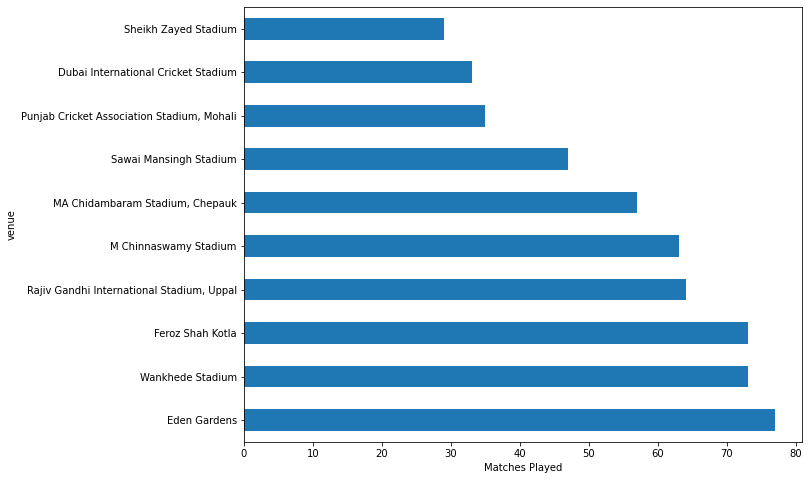

In [33]:
plt.figure(figsize=(10,8))
venues.id[:10].plot(kind='barh')
plt.xlabel("Matches Played")

In [34]:
run_scorers=balls.groupby(['batsman'])['total_runs'].sum().reset_index()
run_scorers = run_scorers.sort_values(["total_runs"], ascending=False)
run_scorers = run_scorers[:10]
run_scorers

,batsman,total_runs
505,V Kohli,6081
438,SK Raina,5604
116,DA Warner,5522
407,S Dhawan,5452
379,RG Sharma,5394
96,CH Gayle,5103
24,AB de Villiers,5016
398,RV Uthappa,4878
301,MS Dhoni,4855
154,G Gambhir,4479


<AxesSubplot:ylabel='batsman'>

<Figure size 720x1296 with 0 Axes>

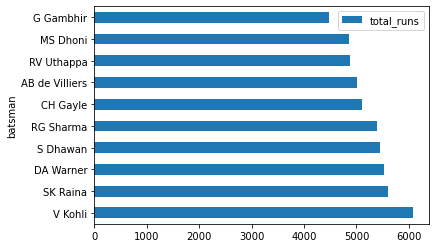

In [35]:
plt.figure(figsize=(10,18))
run_scorers.set_index('batsman', inplace=True)
run_scorers.plot(kind='barh')

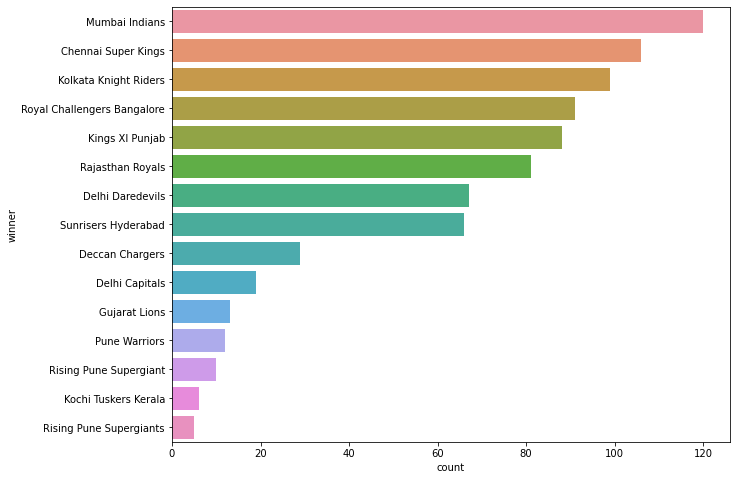

In [36]:
plt.figure(figsize=(10,8))
sns.countplot(data=matches, y='winner', order = list(matches['winner'].value_counts().index))
plt.show()

Text(0, 0.5, 'Player')

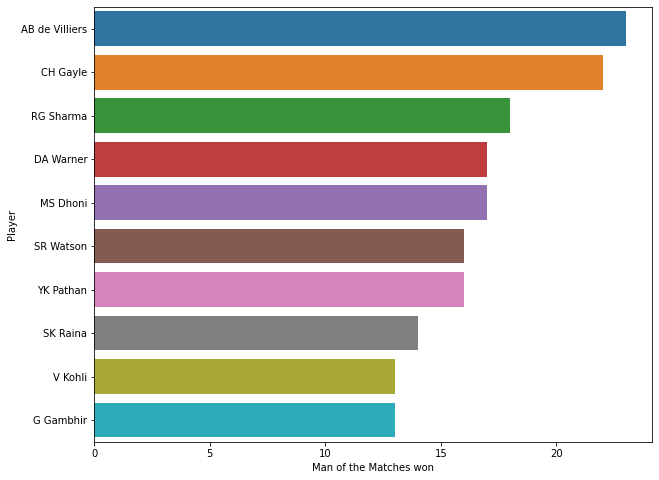

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(order=matches['player_of_match'].value_counts()[:10].index, data=matches, y="player_of_match")
plt.xlabel("Man of the Matches won")
plt.ylabel("Player")

In [38]:
umpires = pd.concat([matches['umpire1'],matches['umpire2']])
umpires = umpires.value_counts()
umpires.df=umpires.to_frame().reset_index()
umpires.df.columns.values[0] = "Umpire"
umpires.df.columns.values[1] = "Matches"
umpires.df=umpires.df[:10]

Text(0, 0.5, 'Umpire')

<Figure size 720x576 with 0 Axes>

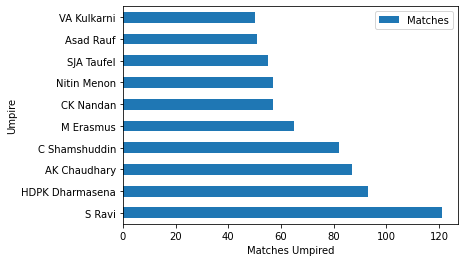

In [39]:
plt.figure(figsize=(10,8))
umpires.df.set_index('Umpire', inplace=True)
umpires.df.plot(kind='barh')
plt.xlabel("Matches Umpired")
plt.ylabel("Umpire")

### Scrapping the results of 2019 WC

In [40]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [41]:
website = 'https://www.cricwaves.com/cricket/tour/413/80/cricket-world-cup-2019/Series.html'
response = requests.get(website)
soup = BeautifulSoup(response.content,'html.parser')
results = soup.find_all('div' ,{'class' : 'cf_uf_col3' })  #finding all possible results from the website
match_results = []
for i in results:
    try:
        match_results.append(i.find('b').get_text())       #extracting the text from the element and appending them to a list
    except:
        match_results.append('NaN')

In [42]:
match_results

['England won by 104 runs',
 'West Indies won by 7 wickets',
 'New Zealand won by 10 wickets',
 'Australia won by 7 wickets',
 'Bangladesh won by 21 runs\n',
 'Pakistan won by 14 runs',
 'Sri Lanka won by 34 runs (D/L method)',
 'India won by 6 wickets',
 'New Zealand won by 2 wickets',
 'Australia won by 15 runs',
 'Match abandoned without a ball bowled',
 'England won by 106 runs',
 'New Zealand won by 7 wickets\n',
 'India won by 36 runs\n',
 'No Result',
 'Match abandoned without a ball bowled',
 'Australia won by 41 runs',
 'Match abandoned without toss',
 'England won by 8 wickets',
 'Australia won by 87 runs',
 'South Africa won by 9 wickets(D/L method)',
 'India won by 89 runs (D/L method)',
 'Bangladesh won by 7 wickets',
 'England won by 150 runs',
 'New Zealand won by 4 wickets',
 'Australia won by 48 runs',
 'Sri Lanka won by 20 runs',
 'India won by 11 runs',
 'New Zealand won by 5 runs',
 'Pakistan won by 49 runs',
 'Bangladesh won by 62 runs',
 'Australia won by 64 runs'

## World Cup Prediction

In [43]:
one_day_results = pd.read_csv('results.csv') 
world_cup_teams = pd.read_csv('World Cup 2019 Dataset.csv')
world_cup_teams

,Team,Group,Previous \r\nappearances,Previous \r\ntitles,Previous\r\n finals,Previous\r\n semifinals,Current \r rank
0,England,A,11,0,3,5,1
1,South Africa,A,6,0,0,4,3
2,West Indies,A,11,2,3,4,8
3,Pakistan,A,11,1,2,6,6
4,New Zealand,A,11,0,1,7,4
5,Sri Lanka,A,11,1,3,4,9
6,Afghanistan,A,1,0,0,0,10
7,Australia,A,11,5,6,7,5
8,Bangladesh,A,5,0,0,0,7
9,India,A,11,2,3,6,2


In [44]:
one_day_results.head()

,date,Team_1,Team_2,Winner,Margin,Ground
0,4-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
3,8-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka


In [45]:
teams_list = world_cup_teams.Team.unique()
teams_list

array(['England', 'South Africa', 'West Indies', 'Pakistan',
       'New Zealand', 'Sri Lanka', 'Afghanistan', 'Australia',
       'Bangladesh', 'India'], dtype=object)

In [46]:
#filtering the dataframe by including only the matches between two World Cup playing nations

team_1 = one_day_results[one_day_results['Team_1'].isin(teams_list)]
team_2 = one_day_results[one_day_results['Team_2'].isin(teams_list)]
one_day_results_df = pd.concat((team_1, team_2))
one_day_results_df = one_day_results_df.drop_duplicates() 
one_day_results_df

,date,Team_1,Team_2,Winner,Margin,Ground
0,4-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
3,8-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka
...,...,...,...,...,...,...
905,26-Feb-17,Zimbabwe,Afghanistan,Afghanistan,106 runs,Harare
929,12-May-17,Ireland,Bangladesh,no result,NaN,Dublin (Malahide)
930,14-May-17,Ireland,New Zealand,New Zealand,51 runs,Dublin (Malahide)
932,19-May-17,Ireland,Bangladesh,Bangladesh,8 wickets,Dublin (Malahide)


In [47]:
one_day_results_df = one_day_results_df.reset_index(drop=True)
one_day_results_df.loc[one_day_results_df.Winner == one_day_results_df.Team_1,'Winning team']= 'Home'
one_day_results_df.loc[one_day_results_df.Winner == one_day_results_df.Team_2, 'Winning team']= 'Away'
one_day_results_df = one_day_results_df.dropna()
one_day_results_df

,date,Team_1,Team_2,Winner,Margin,Ground,Winning team
0,4-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,Away
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,Away
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka,Away
3,8-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,Away
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka,Home
...,...,...,...,...,...,...,...
903,24-Feb-17,Zimbabwe,Afghanistan,Zimbabwe,7 wickets,Harare,Home
904,26-Feb-17,Zimbabwe,Afghanistan,Afghanistan,106 runs,Harare,Away
906,14-May-17,Ireland,New Zealand,New Zealand,51 runs,Dublin (Malahide),Away
907,19-May-17,Ireland,Bangladesh,Bangladesh,8 wickets,Dublin (Malahide),Away


In [48]:
one_day_results_england = one_day_results_df[one_day_results_df['Team_1']=='England']
one_day_results_england

,date,Team_1,Team_2,Winner,Margin,Ground,Winning team
53,22-Jun-10,England,Australia,England,4 wickets,Southampton,Home
55,24-Jun-10,England,Australia,England,4 wickets,Cardiff,Home
56,27-Jun-10,England,Australia,England,1 wicket,Manchester,Home
57,30-Jun-10,England,Australia,Australia,78 runs,The Oval,Away
60,3-Jul-10,England,Australia,Australia,42 runs,Lord's,Away
...,...,...,...,...,...,...,...
745,14-Jun-17,England,Pakistan,Pakistan,8 wickets,Cardiff,Away
765,19-Sep-17,England,West Indies,England,7 wickets,Manchester,Home
769,24-Sep-17,England,West Indies,England,124 runs,Bristol,Home
770,27-Sep-17,England,West Indies,England,6 runs,The Oval,Home


In [49]:
venue = one_day_results_england.Ground.unique()
venue = venue[0:10]
venue

array(['Southampton', 'Cardiff', 'Manchester', 'The Oval', "Lord's",
       'Nottingham', 'Bristol', 'Birmingham', 'Chester-le-Street',
       'Leeds'], dtype=object)

In [50]:
#filtering the dataframe based on the venues of the World Cup

one_day_results_england = one_day_results_df[one_day_results_df['Ground'].isin(venue)]
one_day_results_england

,date,Team_1,Team_2,Winner,Margin,Ground,Winning team
53,22-Jun-10,England,Australia,England,4 wickets,Southampton,Home
55,24-Jun-10,England,Australia,England,4 wickets,Cardiff,Home
56,27-Jun-10,England,Australia,England,1 wicket,Manchester,Home
57,30-Jun-10,England,Australia,Australia,78 runs,The Oval,Away
60,3-Jul-10,England,Australia,Australia,42 runs,Lord's,Away
...,...,...,...,...,...,...,...
748,18-Jun-17,India,Pakistan,Pakistan,180 runs,The Oval,Away
765,19-Sep-17,England,West Indies,England,7 wickets,Manchester,Home
769,24-Sep-17,England,West Indies,England,124 runs,Bristol,Home
770,27-Sep-17,England,West Indies,England,6 runs,The Oval,Home


In [51]:
#Winning accuracy of participating teams at England.

participant_teams = ["Australia","Bangladesh","Pakistan","England","India","South Africa","New Zealand","West Indies","Sri Lanka"]
for team in participant_teams:
    away_temp_df = one_day_results_england[one_day_results_england['Team_2']==team]
    home_temp_df = one_day_results_england[one_day_results_england['Team_1']==team]
    temp_df =  pd.concat((home_temp_df, away_temp_df))
    print(team)
    if (len(home_temp_df != 0)):
        home_wins = home_temp_df[(home_temp_df['Winning team']=='Home')]
    else:
        home_wins = pd.DataFrame()
    if (len(away_temp_df!=0)):
        away_wins = away_temp_df[(away_temp_df['Winning team']=='Away')]
    else:
        away_wins = pd.DataFrame()
    print((len(home_wins)+len(away_wins))/len(temp_df))
    print()

Australia
0.35

Bangladesh
0.3333333333333333

Pakistan
0.3888888888888889

England
0.6463414634146342

India
0.6470588235294118

South Africa
0.38461538461538464

New Zealand
0.4166666666666667

West Indies
0.125

Sri Lanka
0.4



In [52]:
#Winning accuracy of participating teams at the specific venues.

participant_teams = ["Australia","Bangladesh","Pakistan","England","India","South Africa","New Zealand","West Indies","Sri Lanka"]
for team in participant_teams:
    away_temp_df = one_day_results_england[one_day_results_england['Team_2']==team]
    home_temp_df = one_day_results_england[one_day_results_england['Team_1']==team]
    temp_df =  pd.concat((home_temp_df, away_temp_df))
    print(team)
    for stadium in venue:
        print(stadium)
        stadium_away_temp_df = away_temp_df[away_temp_df['Ground']==stadium]
        stadium_home_temp_df = home_temp_df[home_temp_df['Ground']==stadium]
        stadium_temp_df =  pd.concat((stadium_home_temp_df, stadium_away_temp_df))
        if(len(stadium_temp_df) != 0):
            if (len(stadium_home_temp_df != 0)):
                home_wins = stadium_home_temp_df[(stadium_home_temp_df['Winning team']=='Home')]
            else:
                home_wins = pd.DataFrame()
            if (len(stadium_away_temp_df!=0)):
                away_wins = stadium_away_temp_df[(stadium_away_temp_df['Winning team']=='Away')]
            else:
                away_wins = pd.DataFrame()
            print((len(home_wins)+len(away_wins))/len(stadium_temp_df))
        else:
            print("N/A")
    print()
    print()
    print()

Australia
Southampton
0.6666666666666666
Cardiff
0.0
Manchester
0.4
The Oval
0.3333333333333333
Lord's
0.6666666666666666
Nottingham
N/A
Bristol
N/A
Birmingham
0.0
Chester-le-Street
0.0
Leeds
0.0



Bangladesh
Southampton
N/A
Cardiff
1.0
Manchester
N/A
The Oval
0.0
Lord's
N/A
Nottingham
0.0
Bristol
1.0
Birmingham
0.0
Chester-le-Street
N/A
Leeds
N/A



Pakistan
Southampton
0.0
Cardiff
1.0
Manchester
N/A
The Oval
0.6666666666666666
Lord's
0.5
Nottingham
0.0
Bristol
N/A
Birmingham
0.25
Chester-le-Street
0.0
Leeds
0.0



England
Southampton
0.5833333333333334
Cardiff
0.6666666666666666
Manchester
0.75
The Oval
0.7142857142857143
Lord's
0.36363636363636365
Nottingham
0.7142857142857143
Bristol
0.6666666666666666
Birmingham
0.625
Chester-le-Street
0.75
Leeds
0.8333333333333334



India
Southampton
0.0
Cardiff
0.75
Manchester
N/A
The Oval
0.4
Lord's
N/A
Nottingham
1.0
Bristol
N/A
Birmingham
1.0
Chester-le-Street
N/A
Leeds
0.0



South Africa
Southampton
0.5
Cardiff
0.0
Manchester
N/A
The Oval

In [53]:
#creating a vector with all teams as columns, and only the teams contesting the fixture will have the value 1

#training_df = one_day_results_england.append(one_day_results_df,ignore_index = True)
#training_df = one_day_results_england
training_df = one_day_results_england.drop(['date','Margin','Winning team'],axis=1)
training_df = training_df[training_df['Team_1'].isin(participant_teams)]
training_df = training_df[training_df['Team_2'].isin(participant_teams)]
training_df = pd.get_dummies(training_df, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])
X = training_df.drop(['Winner','Ground'],axis=1)
y = training_df["Winner"]

In [54]:
training_df

,Winner,Ground,Team_1_Australia,Team_1_Bangladesh,Team_1_England,Team_1_India,Team_1_New Zealand,Team_1_Pakistan,Team_1_South Africa,Team_2_Australia,Team_2_Bangladesh,Team_2_India,Team_2_New Zealand,Team_2_Pakistan,Team_2_South Africa,Team_2_Sri Lanka,Team_2_West Indies
53,England,Southampton,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
55,England,Cardiff,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
56,England,Manchester,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
57,Australia,The Oval,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
60,Australia,Lord's,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,Pakistan,The Oval,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
765,England,Manchester,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
769,England,Bristol,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
770,England,The Oval,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [55]:
list(training_df.columns)

['Winner',
 'Ground',
 'Team_1_Australia',
 'Team_1_Bangladesh',
 'Team_1_England',
 'Team_1_India',
 'Team_1_New Zealand',
 'Team_1_Pakistan',
 'Team_1_South Africa',
 'Team_2_Australia',
 'Team_2_Bangladesh',
 'Team_2_India',
 'Team_2_New Zealand',
 'Team_2_Pakistan',
 'Team_2_South Africa',
 'Team_2_Sri Lanka',
 'Team_2_West Indies']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Random Forest

In [57]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


{'n_estimators': 1400,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [58]:
#rf = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0,bootstrap=True,min_samples_split = 5,min_samples_leaf = 2,max_features='sqrt') 
rf = RandomForestClassifier(n_estimators=400, max_depth=30,random_state=0,bootstrap = True,min_samples_split = 2,max_features = 'auto') 
rf.fit(X_train, y_train)
y_pred  = rf.predict(X_test)
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)
#print(score)
#print(score2)
accuracy_score(y_test,y_pred)

0.43333333333333335

### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
params = {'penalty':['l1', 'l2','None','elasticnet'], 'C':[0.001, 0.01, 0.1, 1, 10,100],'solver':['newton-cg', 'lbfgs', 'liblinear']}
grid_search_logistic = GridSearchCV(LogisticRegression(), params,n_jobs=-1, cv=10,verbose=1)
grid_search_logistic.fit(X_train, y_train)
grid_search_logistic.best_params_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [60]:
lr = LogisticRegression(C=1.0,penalty = 'l2',solver = 'liblinear', random_state=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
# calculate accuracy score 
accuracy_score(y_test, y_pred)

0.5666666666666667

### SVM model

In [61]:
from sklearn.svm import SVC
params = {'C':[0.001,0.01, 0.1, 1,10,100],'kernel':['linear','poly','rbf','sigmoid']}
grid_search_svc = GridSearchCV(SVC(), params,n_jobs=-1, cv=5,verbose = 10)
grid_search_svc.fit(X_train, y_train)
grid_search_svc.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'C': 1, 'kernel': 'rbf'}

In [62]:
# # fit SVM model
svm = SVC(C=1,kernel='rbf', random_state=0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
# calculate accuracy score 
accuracy_score(y_test, y_pred)

0.5333333333333333

### Decision Tree Classifier

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
params = {'criterion':['gini','entropy'], 'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50], 'splitter':["best", "random"], 'random_state':[0,1,2,4,6,8,10,12,14,16,20,40,42]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), params, n_jobs=-1,cv=10,verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 10 folds for each of 728 candidates, totalling 7280 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'random_state': [0, 1, 2, 4, 6, 8, 10, 12, 14, 16, 20,
                                          40, 42],
                         'splitter': ['best', 'random']},
             verbose=1)

In [64]:
grid_search_dt.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'random_state': 0, 'splitter': 'best'}

In [65]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0,splitter = 'best')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
# calculate accuracy score 
accuracy_score(y_test, y_pred)

0.4666666666666667

In [66]:
icc_rankings = pd.read_csv('icc_rankings.csv') 
world_cup_fixtures = pd.read_csv('2019_Cricket_WorldCup_fixtures.csv')

In [67]:
world_cup_fixtures.insert(1,'Team 1 ranking', world_cup_fixtures['Team_1'].map(icc_rankings.set_index('Team')['Position']))
world_cup_fixtures.insert(2,'Team 2 ranking', world_cup_fixtures['Team_2'].map(icc_rankings.set_index('Team')['Position']))
world_cup_fixtures = world_cup_fixtures.iloc[:45, :]

In [68]:
world_cup_fixtures.head()

,Round Number,Team 1 ranking,Team 2 ranking,Date,Location,Team_1,Team_2,Group,Result
0,1,1.0,3.0,30/05/2019,"Kennington Oval, London",England,South Africa,Group A,NaN
1,1,8.0,6.0,31/05/2019,"Trent Bridge, Nottingham",West Indies,Pakistan,Group A,NaN
2,1,4.0,9.0,1/6/2019,"Sophia Gardens, Cardiff",New Zealand,Sri Lanka,Group A,NaN
3,1,10.0,5.0,1/6/2019,"County Ground, Bristol",Afghanistan,Australia,Group A,NaN
4,1,3.0,7.0,2/6/2019,"Kennington Oval, London",South Africa,Bangladesh,Group A,NaN


In [69]:
predicted_result = []
for index, row in world_cup_fixtures.iterrows():
    if row['Team 1 ranking'] < row['Team 2 ranking']:
        predicted_result.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2']})
    else:
        predicted_result.append({'Team_1': row['Team_2'], 'Team_2': row['Team_1']})

In [70]:
predicted_result = pd.DataFrame(predicted_result)
match_results_duplicate = match_results
match_results_duplicate = match_results_duplicate[:-3]
predicted_result['Winners'] = match_results_duplicate
actual = []
for result in match_results_duplicate:
    i = 0
    result = result.split(" ", 1)
    actual.append(result[0])
    i+=1
actual = [sub.replace('West', 'West Indies') for sub in actual]
actual = [sub.replace('South', 'South Africa') for sub in actual]
actual = [sub.replace('New', 'New Zealand') for sub in actual]
actual = [sub.replace('Sri', 'Sri Lanka') for sub in actual]
predicted_result['Actual Winners'] = actual

In [71]:
#creating a vector with all teams as columns, and only the teams contesting the fixture will have the value 1

predicted_result_dummy = predicted_result
predicted_result_dummy = pd.get_dummies(predicted_result_dummy, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])
missing_columns = set(training_df.columns) - set(predicted_result_dummy.columns)

In [72]:
for column in missing_columns:
    predicted_result_dummy[column] = 0
predicted_result_dummy = predicted_result_dummy[training_df.columns]

In [73]:
predicted_result_dummy.head()
predicted_result_dummy_2 = predicted_result_dummy.drop(['Winner','Ground'],axis=1)

In [74]:
world_cup_fixtures = world_cup_fixtures.iloc[:, [5,6]]
world_cup_fixtures

,Team_1,Team_2
0,England,South Africa
1,West Indies,Pakistan
2,New Zealand,Sri Lanka
3,Afghanistan,Australia
4,South Africa,Bangladesh
5,England,Pakistan
6,Afghanistan,Sri Lanka
7,South Africa,India
8,Bangladesh,New Zealand
9,Australia,West Indies


### Logistic Regression

In [75]:
#predicted_result_dummy = predicted_result
lr = LogisticRegression(C=1.0,penalty = 'l2',solver = 'liblinear', random_state=0)
lr.fit(X,y)
lr_predictions = lr.predict(predicted_result_dummy_2)
predicted_winners = []
for i in range(world_cup_fixtures.shape[0]):
    if lr_predictions[i] == 1:
        predicted_winners.append(predicted_result.iloc[i, 1])
    else:
        predicted_winners.append(predicted_result.iloc[i, 0])    
predicted_result_dummy['Prediction'] = predicted_winners

In [76]:
for team in teams_list:
    win_count = predicted_winners.count(team)
    print(team)
    print(win_count)

England
9
South Africa
7
West Indies
2
Pakistan
4
New Zealand
6
Sri Lanka
1
Afghanistan
0
Australia
5
Bangladesh
3
India
8


In [77]:
accuracy_score(actual,predicted_winners)

0.6888888888888889

In [78]:
f1_score(actual, predicted_winners,average = 'macro')

0.5459136822773186

In [79]:
accuracy_score(actual,predicted_winners)

0.6888888888888889

In [80]:
f1_score(actual, predicted_winners,average = 'micro')

0.6888888888888889

### Predicting Knockout games

In [81]:
def predict_knockout_matches(Team_1,Team_2,icc_rankings,df):
    teams = []
    teams.append(icc_rankings.loc[icc_rankings['Team'] == Team_1,'Position'].iloc[0])
    teams.append(icc_rankings.loc[icc_rankings['Team'] == Team_2,'Position'].iloc[0])
    #print(teams)
    dict1 = {}
    if teams[0] < teams[1]:
        dict1.update({'Team_1': Team_1, 'Team_2': Team_2})
    else:
        dict1.update({'Team_1': Team_2, 'Team_2': Team_1})
    predictions = []
    predictions.append(dict1)
    predictions = pd.DataFrame(predictions)
    #print(predictions)
    predictions_dummy = predictions
    
    #creating a vector with all teams as columns, and only the teams contesting the fixture will have the value 1
    
    predictions_dummy = pd.get_dummies(predictions_dummy, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])
    missing_columns = set(df.columns) - set(predictions_dummy.columns)
    for column in missing_columns:
        predictions_dummy[column] = 0
    predictions_dummy = predictions_dummy[df.columns]
    predictions_dummy_2 = predictions_dummy.drop(['Winner','Ground'],axis=1)
    #print(predictions_dummy_2.columns)
    predicted_winner = lr.predict(predictions_dummy_2)
    #print(predictions)
    if predicted_winner == 1:
        print(predictions.iloc[0, 1])
    else:
        print(predictions.iloc[0, 0])

In [82]:
predict_knockout_matches('England', 'New Zealand',icc_rankings,training_df)

England


In [83]:
predict_knockout_matches('India', 'South Africa',icc_rankings,training_df)

India


In [84]:
predict_knockout_matches('England', 'India',icc_rankings,training_df)

England


In [85]:
world_cup_fixtures['actual_result'] = actual
world_cup_fixtures['predicted'] = predicted_winners
world_cup_fixtures

,Team_1,Team_2,actual_result,predicted
0,England,South Africa,England,England
1,West Indies,Pakistan,West Indies,Pakistan
2,New Zealand,Sri Lanka,New Zealand,New Zealand
3,Afghanistan,Australia,Australia,Australia
4,South Africa,Bangladesh,Bangladesh,South Africa
5,England,Pakistan,Pakistan,England
6,Afghanistan,Sri Lanka,Sri Lanka,Sri Lanka
7,South Africa,India,India,India
8,Bangladesh,New Zealand,New Zealand,New Zealand
9,Australia,West Indies,Australia,Australia


In [86]:
prediction_class = []
for index, row in world_cup_fixtures.iterrows():
    if(row['actual_result'] == row['predicted']):
        prediction_class.append(1)
    elif((row['actual_result'] == 'No') | (row['actual_result'] == 'Match')):
        prediction_class.append(2)
    else:
        prediction_class.append(3)

In [87]:
world_cup_fixtures['class'] = prediction_class

In [88]:
sum(world_cup_fixtures['class']==1)/(sum(world_cup_fixtures['class']==1) + sum(world_cup_fixtures['class']==3))

0.7560975609756098

In [89]:
world_cup_fixtures[world_cup_fixtures['class']==3]

,Team_1,Team_2,actual_result,predicted,class
1,West Indies,Pakistan,West Indies,Pakistan,3
4,South Africa,Bangladesh,Bangladesh,South Africa,3
5,England,Pakistan,Pakistan,England,3
24,New Zealand,South Africa,New Zealand,South Africa,3
26,England,Sri Lanka,Sri Lanka,England,3
29,Pakistan,South Africa,Pakistan,South Africa,3
31,England,Australia,Australia,England,3
32,New Zealand,Pakistan,Pakistan,New Zealand,3
36,New Zealand,Australia,Australia,New Zealand,3
38,Sri Lanka,West Indies,Sri Lanka,West Indies,3


### Indian Premier League

In [90]:
matches.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [91]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [92]:
matches.city.unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

In [93]:
matches_df = matches.replace(to_replace ="Bengaluru",
                 value ="Bangalore")

In [94]:
matches_df.city.unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Dubai', 'Sharjah'],
      dtype=object)

In [95]:
overseas_cities = ['Cape Town','Port Elizabeth','Durban','Centurion','East London','Johannesburg','Kimberley','Bloemfontein','Abu Dhabi','Dubai','Sharjah']
matches_filtered_df = pd.DataFrame(matches_df[~matches_df['city'].isin(overseas_cities)])
matches_filtered_df.city.unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Ahmedabad', 'Cuttack', 'Nagpur',
       'Dharamsala', 'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur',
       'Ranchi', nan, 'Rajkot', 'Kanpur'], dtype=object)

In [96]:
matches_filtered_df = matches_filtered_df.dropna(subset=['city'],how='all')
matches_filtered_df.city.unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Ahmedabad', 'Cuttack', 'Nagpur',
       'Dharamsala', 'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur',
       'Ranchi', 'Rajkot', 'Kanpur'], dtype=object)

In [97]:
matches_filtered_df['city'].value_counts()

Mumbai           101
Bangalore         77
Kolkata           77
Delhi             73
Hyderabad         64
Chennai           57
Chandigarh        56
Jaipur            47
Pune              38
Visakhapatnam     13
Ahmedabad         12
Rajkot            10
Dharamsala         9
Indore             9
Cuttack            7
Ranchi             7
Raipur             6
Kochi              5
Kanpur             4
Nagpur             3
Name: city, dtype: int64

In [98]:
#filtering only based on major venues

major_cities = ['Mumbai','Bangalore','Kolkata','Delhi','Hyderabad','Chennai','Chandigarh','Jaipur','Pune']
matches_filtered_df = pd.DataFrame(matches_df[matches_df['city'].isin(major_cities)])
matches_filtered_df.city.unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Pune'], dtype=object)

In [99]:
matches_filtered_df['team1'].value_counts()

Mumbai Indians                 82
Royal Challengers Bangalore    77
Kolkata Knight Riders          75
Chennai Super Kings            70
Delhi Daredevils               65
Kings XI Punjab                60
Rajasthan Royals               51
Sunrisers Hyderabad            47
Pune Warriors                  23
Deccan Chargers                20
Rising Pune Supergiant          7
Delhi Capitals                  7
Rising Pune Supergiants         4
Gujarat Lions                   2
Name: team1, dtype: int64

In [100]:
#replacing the names of franchises

matches_filtered_df = matches_filtered_df.replace(to_replace ="Deccan Chargers",
                 value ="Sunrisers Hyderabad")
matches_filtered_df = matches_filtered_df.replace(to_replace ="Rising Pune Supergiant",
                 value ="Pune Warriors")
matches_filtered_df = matches_filtered_df.replace(to_replace ="Rising Pune Supergiants",
                 value ="Pune Warriors")
matches_filtered_df = matches_filtered_df.replace(to_replace ="Delhi Capitals",
                 value ="Delhi Daredevils")

matches_filtered_df['team1'].value_counts()

Mumbai Indians                 82
Royal Challengers Bangalore    77
Kolkata Knight Riders          75
Delhi Daredevils               72
Chennai Super Kings            70
Sunrisers Hyderabad            67
Kings XI Punjab                60
Rajasthan Royals               51
Pune Warriors                  34
Gujarat Lions                   2
Name: team1, dtype: int64

In [101]:
matches_filtered_df['team2'].value_counts()

Mumbai Indians                 75
Kings XI Punjab                72
Kolkata Knight Riders          71
Sunrisers Hyderabad            70
Royal Challengers Bangalore    67
Delhi Daredevils               63
Chennai Super Kings            60
Rajasthan Royals               59
Pune Warriors                  32
Gujarat Lions                  14
Kochi Tuskers Kerala            7
Name: team2, dtype: int64

In [102]:
#replacing the one-off teams

one_off_teams = ['Kochi Tuskers Kerala','Gujarat Lions']
matches_filtered_df = matches_filtered_df[~matches_filtered_df['team1'].isin(one_off_teams)]
matches_filtered_df = matches_filtered_df[~matches_filtered_df['team2'].isin(one_off_teams)]
matches_filtered_df['team2'].value_counts()

Mumbai Indians                 75
Kings XI Punjab                72
Kolkata Knight Riders          71
Sunrisers Hyderabad            69
Royal Challengers Bangalore    66
Delhi Daredevils               63
Chennai Super Kings            60
Rajasthan Royals               59
Pune Warriors                  32
Name: team2, dtype: int64

In [103]:
matches_filtered_df['team1'].value_counts()

Mumbai Indians                 79
Royal Challengers Bangalore    74
Kolkata Knight Riders          72
Delhi Daredevils               69
Chennai Super Kings            69
Sunrisers Hyderabad            65
Kings XI Punjab                58
Rajasthan Royals               50
Pune Warriors                  31
Name: team1, dtype: int64

In [104]:
major_teams = matches_filtered_df.team1.unique()
major_cities = matches_filtered_df.city.unique()

### Winning percentage of each team in each venue

In [105]:
for team in major_teams:
    print(team)
    for city in major_cities:
        print(city)
        subset_df = matches_filtered_df.loc[(matches_filtered_df['city']==city) & ((matches_filtered_df['team1']==team) | (matches_filtered_df['team2']==team))]
        subset_df_won = subset_df[subset_df['winner']==team]
        print(len(subset_df_won)/len(subset_df))
        print()
    print()
    print()

Royal Challengers Bangalore
Bangalore
0.4927536231884058

Chandigarh
0.5714285714285714

Delhi
0.6666666666666666

Mumbai
0.38461538461538464

Kolkata
0.4

Jaipur
0.42857142857142855

Hyderabad
0.2

Chennai
0.2222222222222222

Pune
0.6666666666666666



Kings XI Punjab
Bangalore
0.4166666666666667

Chandigarh
0.5555555555555556

Delhi
0.45454545454545453

Mumbai
0.38461538461538464

Kolkata
0.2727272727272727

Jaipur
0.16666666666666666

Hyderabad
0.4

Chennai
0.3333333333333333

Pune
0.14285714285714285



Delhi Daredevils
Bangalore
0.4444444444444444

Chandigarh
0.14285714285714285

Delhi
0.45454545454545453

Mumbai
0.3076923076923077

Kolkata
0.2222222222222222

Jaipur
0.3333333333333333

Hyderabad
0.625

Chennai
0.25

Pune
0.5



Mumbai Indians
Bangalore
0.75

Chandigarh
0.5

Delhi
0.36363636363636365

Mumbai
0.6582278481012658

Kolkata
0.7692307692307693

Jaipur
0.2857142857142857

Hyderabad
0.6363636363636364

Chennai
0.625

Pune
0.8



Kolkata Knight Riders
Bangalore
0.615384615

### Winning percentage of each team against other teams in the league 

In [106]:
for team1 in major_teams:
    print(team1)
    print()
    for team2 in major_teams:
        if team2 != team1:
            print(team2)
            teams_subset = [team1,team2]
            subset_df_teams = matches_filtered_df.loc[(matches_filtered_df['team1'].isin(teams_subset)) & (matches_filtered_df['team2'].isin(teams_subset))]
            subset_df_team1_won = subset_df_teams[subset_df_teams['winner']==team1]
            print(len(subset_df_team1_won)/len(subset_df_teams))
            print()

Royal Challengers Bangalore

Kings XI Punjab
0.5555555555555556

Delhi Daredevils
0.6111111111111112

Mumbai Indians
0.3181818181818182

Kolkata Knight Riders
0.4

Rajasthan Royals
0.42857142857142855

Sunrisers Hyderabad
0.47619047619047616

Chennai Super Kings
0.2777777777777778

Pune Warriors
0.7777777777777778

Kings XI Punjab

Royal Challengers Bangalore
0.4444444444444444

Delhi Daredevils
0.5789473684210527

Mumbai Indians
0.4444444444444444

Kolkata Knight Riders
0.3

Rajasthan Royals
0.35714285714285715

Sunrisers Hyderabad
0.4444444444444444

Chennai Super Kings
0.4

Pune Warriors
0.5

Delhi Daredevils

Royal Challengers Bangalore
0.3888888888888889

Kings XI Punjab
0.42105263157894735

Mumbai Indians
0.45

Kolkata Knight Riders
0.3157894736842105

Rajasthan Royals
0.4375

Sunrisers Hyderabad
0.47058823529411764

Chennai Super Kings
0.25

Pune Warriors
0.5714285714285714

Mumbai Indians

Royal Challengers Bangalore
0.6818181818181818

Kings XI Punjab
0.5555555555555556

Delhi

### Winning percentage of each team while Batting first and Batting second

In [107]:
for team in major_teams:
    print(team)
    print()
    first_batting_df = matches_filtered_df.loc[((matches_filtered_df['team1']==team) | (matches_filtered_df['team2']==team)) & (((matches_filtered_df['toss_winner']==team) & (matches_filtered_df['toss_decision']=='bat')) | ((matches_filtered_df['toss_winner']!=team) & (matches_filtered_df['toss_decision']=='field')))]
    second_batting_df = matches_filtered_df.loc[((matches_filtered_df['team1']==team) | (matches_filtered_df['team2']==team)) & (((matches_filtered_df['toss_winner']==team) & (matches_filtered_df['toss_decision']=='field')) | ((matches_filtered_df['toss_winner']!=team) & (matches_filtered_df['toss_decision']=='bat')))]
    first_batting_won = first_batting_df[first_batting_df['winner']==team]
    second_batting_won = second_batting_df[second_batting_df['winner']==team]
    print("Winning percentage batting first:")
    print(len(first_batting_won)/len(first_batting_df))
    print("Winning percentage batting second:")
    print(len(second_batting_won)/len(second_batting_df))
    print()
    print("Toss winning percentage:")
    toss_won = matches_filtered_df.loc[(matches_filtered_df['winner']==team) & (matches_filtered_df['toss_winner']==team)]
    toss_subset = matches_filtered_df.loc[matches_filtered_df['toss_winner']==team]
    print(len(toss_won)/len(toss_subset))
    print()

Royal Challengers Bangalore

Winning percentage batting first:
0.4411764705882353
Winning percentage batting second:
0.4722222222222222

Toss winning percentage:
0.4838709677419355

Kings XI Punjab

Winning percentage batting first:
0.3939393939393939
Winning percentage batting second:
0.46875

Toss winning percentage:
0.36507936507936506

Delhi Daredevils

Winning percentage batting first:
0.36065573770491804
Winning percentage batting second:
0.43661971830985913

Toss winning percentage:
0.4090909090909091

Mumbai Indians

Winning percentage batting first:
0.6341463414634146
Winning percentage batting second:
0.625

Toss winning percentage:
0.6049382716049383

Kolkata Knight Riders

Winning percentage batting first:
0.45588235294117646
Winning percentage batting second:
0.6666666666666666

Toss winning percentage:
0.6338028169014085

Rajasthan Royals

Winning percentage batting first:
0.40816326530612246
Winning percentage batting second:
0.6

Toss winning percentage:
0.5079365079365

### Analyzing each venue

In [108]:
for city in major_cities:
    print(city)
    print()
    subset_city = matches_filtered_df.loc[(matches_filtered_df['city']==city)]
    first_batting_won = subset_city[subset_city['result']=='runs'] 
    second_batting_won = subset_city[subset_city['result']=='wickets'] 
    print("Winning percentage of teams batting first:")
    print(len(first_batting_won)/len(subset_city))
    print("Winning percentage of teams batting second:")
    print(len(second_batting_won)/len(subset_city))
    print("Winning percentage of Toss winning teams:")
    toss_subset = subset_city[subset_city['winner']==subset_city['toss_winner']]
    print(len(toss_subset)/len(subset_city))
    print()

Bangalore

Winning percentage of teams batting first:
0.4383561643835616
Winning percentage of teams batting second:
0.547945205479452
Winning percentage of Toss winning teams:
0.5616438356164384

Chandigarh

Winning percentage of teams batting first:
0.4444444444444444
Winning percentage of teams batting second:
0.5555555555555556
Winning percentage of Toss winning teams:
0.46296296296296297

Delhi

Winning percentage of teams batting first:
0.4927536231884058
Winning percentage of teams batting second:
0.4927536231884058
Winning percentage of Toss winning teams:
0.5072463768115942

Mumbai

Winning percentage of teams batting first:
0.4948453608247423
Winning percentage of teams batting second:
0.4948453608247423
Winning percentage of Toss winning teams:
0.5154639175257731

Kolkata

Winning percentage of teams batting first:
0.4189189189189189
Winning percentage of teams batting second:
0.581081081081081
Winning percentage of Toss winning teams:
0.5540540540540541

Jaipur

Winning per

In [109]:
balls_played = balls.groupby(['batsman'])['ball'].count().reset_index()
balls_played.sort_values(by='ball',ascending=False).head(10)

,batsman,ball
505,V Kohli,4609
407,S Dhawan,4208
379,RG Sharma,4088
438,SK Raina,4041
116,DA Warner,3819
398,RV Uthappa,3658
154,G Gambhir,3524
301,MS Dhoni,3493
96,CH Gayle,3342
42,AM Rahane,3325


In [110]:
balls_updated = pd.merge(balls,matches[['id','city']],on="id",how="left")
#balls_updated = pd.merge(balls, matches[["city"]], on="id", how="left")

In [111]:
balls.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [112]:
matches.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [113]:
balls_updated.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,city
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore


### Analyzing the top run scorer in each venue

In [114]:
for city in major_cities:
    print(city)
    print()
    balls_city = balls_updated[balls_updated['city']==city]
    #print(balls_city.head())
    run_scorers=balls_city.groupby(['batsman'])['total_runs'].sum().reset_index()
    run_scorers = run_scorers.sort_values(["total_runs"], ascending=False)
    print(run_scorers[:5])
    print()

Bangalore

            batsman  total_runs
240         V Kohli        1943
45         CH Gayle        1630
12   AB de Villiers        1391
95        JH Kallis         427
235      TM Dilshan         353

Chandigarh

       batsman  total_runs
203   SE Marsh        1115
50   DA Miller         685
41    CH Gayle         616
125    M Vijay         462
108   KL Rahul         455

Delhi

       batsman  total_runs
273   V Sehwag         980
249    SS Iyer         896
217    RR Pant         796
220   S Dhawan         763
84   G Gambhir         715

Mumbai

          batsman  total_runs
223     RG Sharma        1887
122    KA Pollard        1529
271  SR Tendulkar        1227
30      AT Rayudu        1109
259      SK Raina         777

Kolkata

        batsman  total_runs
68    G Gambhir        1496
188  RV Uthappa        1227
255   YK Pathan         908
13   AD Russell         737
137   MK Pandey         619

Jaipur

        batsman  total_runs
25    AM Rahane        1150
209   SR Watson     

In [115]:
balls_updated = balls_updated.replace(to_replace ="Deccan Chargers",
                 value ="Sunrisers Hyderabad")
balls_updated = balls_updated.replace(to_replace ="Rising Pune Supergiant",
                 value ="Pune Warriors")
balls_updated = balls_updated.replace(to_replace ="Rising Pune Supergiants",
                 value ="Pune Warriors")
balls_updated = balls_updated.replace(to_replace ="Delhi Capitals",
                 value ="Delhi Daredevils")

### Analyzing the top run scorer in each venue(only visiting batsmen)

In [116]:
for city in major_cities:
    print(city)
    print()
    balls_city = balls_updated[balls_updated['city']==city]
    if (city == 'Bangalore'):
        team = ['Royal Challengers Bangalore']
        balls_city = balls_city[~balls_city['batting_team'].isin(team)]
        run_scorers=balls_city.groupby(['batsman'])['total_runs'].sum().reset_index()
        run_scorers = run_scorers.sort_values(["total_runs"], ascending=False)
        print(run_scorers[:5])
        print()
    elif (city == 'Kolkata'):
        team = ['Kolkata Knight Riders']
        balls_city = balls_city[~balls_city['batting_team'].isin(team)]
        run_scorers=balls_city.groupby(['batsman'])['total_runs'].sum().reset_index()
        run_scorers = run_scorers.sort_values(["total_runs"], ascending=False)
        print(run_scorers[:5])
        print()
    elif (city == 'Chennai'):
        team = ['Chennai Super Kings']
        balls_city = balls_city[~balls_city['batting_team'].isin(team)]
        run_scorers=balls_city.groupby(['batsman'])['total_runs'].sum().reset_index()
        run_scorers = run_scorers.sort_values(["total_runs"], ascending=False)
        print(run_scorers[:5])
        print()
    elif (city == 'Pune'):
        team = ['Pune Warriors','Risin']
        balls_city = balls_city[~balls_city['batting_team'].isin(team)]
        run_scorers=balls_city.groupby(['batsman'])['total_runs'].sum().reset_index()
        run_scorers = run_scorers.sort_values(["total_runs"], ascending=False)
        print(run_scorers[:5])
        print()
    elif (city == 'Delhi'):
        team = ['Delhi Daredevils']
        balls_city = balls_city[~balls_city['batting_team'].isin(team)]
        run_scorers=balls_city.groupby(['batsman'])['total_runs'].sum().reset_index()
        run_scorers = run_scorers.sort_values(["total_runs"], ascending=False)
        print(run_scorers[:5])
        print()
    elif (city == 'Hyderabad'):
        team = ['Sunrisers Hyderabad']
        balls_city = balls_city[~balls_city['batting_team'].isin(team)]
        run_scorers=balls_city.groupby(['batsman'])['total_runs'].sum().reset_index()
        run_scorers = run_scorers.sort_values(["total_runs"], ascending=False)
        print(run_scorers[:5])
        print()
    elif (city == 'Mumbai'):
        team = ['Mumbai Indians']
        balls_city = balls_city[~balls_city['batting_team'].isin(team)]
        run_scorers=balls_city.groupby(['batsman'])['total_runs'].sum().reset_index()
        run_scorers = run_scorers.sort_values(["total_runs"], ascending=False)
        print(run_scorers[:5])
        print()
    elif (city == 'Jaipur'):
        team = ['Rajasthan Royals']
        balls_city = balls_city[~balls_city['batting_team'].isin(team)]
        run_scorers=balls_city.groupby(['batsman'])['total_runs'].sum().reset_index()
        run_scorers = run_scorers.sort_values(["total_runs"], ascending=False)
        print(run_scorers[:5])
        print()
    elif (city == 'Chandigarh'):
        team = ['Kings XI Punjab']
        balls_city = balls_city[~balls_city['batting_team'].isin(team)]
        run_scorers=balls_city.groupby(['batsman'])['total_runs'].sum().reset_index()
        run_scorers = run_scorers.sort_values(["total_runs"], ascending=False)
        print(run_scorers[:5])
        print()


Bangalore

         batsman  total_runs
40     DA Warner         349
58     G Gambhir         323
126     MS Dhoni         319
20     AT Rayudu         287
27   BB McCullum         267

Chandigarh

            batsman  total_runs
56        G Gambhir         327
128        PA Patel         262
41        DA Warner         238
9    AB de Villiers         237
149        S Dhawan         232

Delhi

       batsman  total_runs
232    V Kohli         444
41    CH Gayle         375
198   SK Raina         364
179  RG Sharma         320
19   AM Rahane         268

Mumbai

        batsman  total_runs
225    SK Raina         777
235   SR Watson         565
270   YK Pathan         549
205  RV Uthappa         478
24    AM Rahane         447

Kolkata

       batsman  total_runs
159  RG Sharma         485
36    CH Gayle         448
182   SK Raina         335
209    V Kohli         309
171   S Dhawan         291

Jaipur

            batsman  total_runs
145      RV Uthappa         208
166    SR Tendulka

### Analyzing the top run scorer against each team

In [117]:
for team in major_teams:
    print(team)
    print()
    balls_teams = balls_updated[balls_updated['bowling_team']==team]
    run_scorers=balls_teams.groupby(['batsman'])['total_runs'].sum().reset_index()
    run_scorers = run_scorers.sort_values(["total_runs"], ascending=False)
    print(run_scorers[:5])
    print()

Royal Challengers Bangalore

       batsman  total_runs
203   MS Dhoni         864
71   DA Warner         737
252  RG Sharma         730
282   SK Raina         696
37   AT Rayudu         690

Kings XI Punjab

        batsman  total_runs
68    DA Warner         957
53     CH Gayle         850
267    SK Raina         846
244  RV Uthappa         795
93    G Gambhir         785

Delhi Daredevils

        batsman  total_runs
328     V Kohli         928
250   RG Sharma         836
34    AM Rahane         825
262  RV Uthappa         698
283    SK Raina         632

Mumbai Indians

            batsman  total_runs
286        SK Raina         866
268        S Dhawan         776
15   AB de Villiers         756
65         CH Gayle         728
195        MS Dhoni         716

Kolkata Knight Riders

       batsman  total_runs
220  RG Sharma         988
67   DA Warner         958
249   SK Raina         849
289    V Kohli         738
55    CH Gayle         733

Rajasthan Royals

            batsman  t

### Top wicket takers

In [118]:
wicket_deliveries = balls_updated[balls_updated['is_wicket']==1]
bowlers_credited = ['run out','retired hurt','obstructing the field']
wicket_deliveries_updated = wicket_deliveries[~wicket_deliveries['dismissal_kind'].isin(bowlers_credited)]

In [119]:
wicket_takers= wicket_deliveries_updated['bowler'].value_counts()
wicket_takers.head(10)

SL Malinga         170
A Mishra           160
PP Chawla          156
DJ Bravo           153
Harbhajan Singh    150
R Ashwin           138
B Kumar            136
SP Narine          127
YS Chahal          121
UT Yadav           119
Name: bowler, dtype: int64

### Top wicket takers across each venue

In [120]:
for city in major_cities:
    print(city)
    print()
    balls_city = wicket_deliveries[wicket_deliveries['city']==city]
    #print(balls_city.head())
    wicket_takers = balls_city['bowler'].value_counts()
    print(wicket_takers[:5])
    print()

Bangalore

R Vinay Kumar    32
YS Chahal        32
Z Khan           31
S Aravind        25
SR Watson        22
Name: bowler, dtype: int64

Chandigarh

PP Chawla         25
Sandeep Sharma    23
IK Pathan         21
AR Patel          18
MM Sharma         16
Name: bowler, dtype: int64

Delhi

A Mishra       60
UT Yadav       39
M Morkel       29
Z Khan         20
Imran Tahir    17
Name: bowler, dtype: int64

Mumbai

SL Malinga         90
Harbhajan Singh    66
MJ McClenaghan     39
JJ Bumrah          37
DS Kulkarni        34
Name: bowler, dtype: int64

Kolkata

SP Narine          61
PP Chawla          43
AD Russell         29
Shakib Al Hasan    26
R Bhatia           23
Name: bowler, dtype: int64

Jaipur

SK Trivedi       41
SR Watson        22
SK Warne         21
Sohail Tanvir    17
KK Cooper        17
Name: bowler, dtype: int64

Hyderabad

B Kumar        40
A Mishra       33
Rashid Khan    31
DW Steyn       29
S Kaul         24
Name: bowler, dtype: int64

Chennai

DJ Bravo        50
R Ash

### Top wicket takers across each venue (only visiting bowlers)

In [121]:
for city in major_cities:
    print(city)
    print()
    balls_city = wicket_deliveries[wicket_deliveries['city']==city]
    if (city == 'Bangalore'):
        team = ['Royal Challengers Bangalore']
        balls_city = balls_city[~balls_city['bowling_team'].isin(team)]
        wicket_takers = balls_city['bowler'].value_counts()
        print(wicket_takers[:5])
        print()
    elif (city == 'Kolkata'):
        team = ['Kolkata Knight Riders']
        balls_city = balls_city[~balls_city['bowling_team'].isin(team)]
        wicket_takers = balls_city['bowler'].value_counts()
        print(wicket_takers[:5])
        print()
    elif (city == 'Chennai'):
        team = ['Chennai Super Kings']
        balls_city = balls_city[~balls_city['bowling_team'].isin(team)]
        wicket_takers = balls_city['bowler'].value_counts()
        print(wicket_takers[:5])
        print()
    elif (city == 'Pune'):
        team = ['Pune Warriors']
        balls_city = balls_city[~balls_city['bowling_team'].isin(team)]
        wicket_takers = balls_city['bowler'].value_counts()
        print(wicket_takers[:5])
        print()
    elif (city == 'Delhi'):
        team = ['Delhi Daredevils']
        balls_city = balls_city[~balls_city['bowling_team'].isin(team)]
        wicket_takers = balls_city['bowler'].value_counts()
        print(wicket_takers[:5])
        print()
    elif (city == 'Hyderabad'):
        team = ['Sunrisers Hyderabad']
        balls_city = balls_city[~balls_city['bowling_team'].isin(team)]
        wicket_takers = balls_city['bowler'].value_counts()
        print(wicket_takers[:5])
        print()
    elif (city == 'Mumbai'):
        team = ['Mumbai Indians']
        balls_city = balls_city[~balls_city['bowling_team'].isin(team)]
        wicket_takers = balls_city['bowler'].value_counts()
        print(wicket_takers[:5])
        print()
    elif (city == 'Jaipur'):
        team = ['Rajasthan Royals']
        balls_city = balls_city[~balls_city['bowling_team'].isin(team)]
        wicket_takers = balls_city['bowler'].value_counts()
        print(wicket_takers[:5])
        print()
    elif (city == 'Chandigarh'):
        team = ['Kings XI Punjab']
        balls_city = balls_city[~balls_city['bowling_team'].isin(team)]
        wicket_takers = balls_city['bowler'].value_counts()
        print(wicket_takers[:5])
        print()

Bangalore

PP Chawla    15
UT Yadav     13
A Nehra      10
L Balaji      9
JJ Bumrah     9
Name: bowler, dtype: int64

Chandigarh

SR Watson          11
B Kumar            10
SL Malinga          9
Harbhajan Singh     9
SP Narine           9
Name: bowler, dtype: int64

Delhi

SL Malinga    13
DJ Bravo      12
JD Unadkat    12
B Kumar       10
SP Narine     10
Name: bowler, dtype: int64

Mumbai

SR Watson    19
DJ Bravo     16
RA Jadeja    14
R Ashwin     14
A Nehra      13
Name: bowler, dtype: int64

Kolkata

B Kumar            12
DJ Bravo           10
Harbhajan Singh    10
R Vinay Kumar       9
R Ashwin            9
Name: bowler, dtype: int64

Jaipur

R Ashwin           6
A Mishra           5
Harbhajan Singh    5
AJ Tye             5
RA Jadeja          5
Name: bowler, dtype: int64

Hyderabad

DJ Bravo      11
JD Unadkat    11
SL Malinga    10
CH Morris     10
AB Dinda       9
Name: bowler, dtype: int64

Chennai

PP Ojha       12
PP Chawla      9
SL Malinga     8
A Nehra        8
A Mish

### Top bowlers against each team

In [122]:
for team in major_teams:
    print(team)
    print()
    balls_teams = wicket_deliveries[wicket_deliveries['batting_team']==team]
    wicket_takers = balls_teams['bowler'].value_counts()
    print(wicket_takers[:5])
    print()
    print()

Royal Challengers Bangalore

Sandeep Sharma     25
Harbhajan Singh    25
A Nehra            24
JJ Bumrah          23
RA Jadeja          21
Name: bowler, dtype: int64


Kings XI Punjab

SP Narine          31
UT Yadav           31
SL Malinga         27
DJ Bravo           26
Harbhajan Singh    24
Name: bowler, dtype: int64


Delhi Daredevils

R Ashwin           25
Harbhajan Singh    25
PP Chawla          24
SP Narine          23
SL Malinga         23
Name: bowler, dtype: int64


Mumbai Indians

DJ Bravo     31
PP Chawla    28
MM Sharma    24
SP Narine    24
R Ashwin     22
Name: bowler, dtype: int64


Kolkata Knight Riders

B Kumar          28
R Vinay Kumar    24
SL Malinga       23
Z Khan           21
DJ Bravo         21
Name: bowler, dtype: int64


Rajasthan Royals

A Mishra     33
PP Chawla    21
R Ashwin     19
RA Jadeja    17
JA Morkel    16
Name: bowler, dtype: int64


Sunrisers Hyderabad

SL Malinga    33
DJ Bravo      29
R Bhatia      20
A Mishra      20
UT Yadav      19
Name: bow

### T20 World Cup

In [123]:
t20_matches = pd.read_csv('t20_matches.csv')

In [124]:
t20_matches.head()

,match_id,series_id,match_details,result,scores,date,venue,round,home,away,...,innings1_wickets,innings1_overs_batted,innings1_overs,innings2,innings2_runs,innings2_wickets,innings2_overs_batted,innings2_overs,D/L_method,target
0,304744,124121,North Group:Durham v Nottinghamshire at Cheste...,Durham won by 6 wickets (with 5 balls remaining),Nottinghamshire 157/7 (20/20 ov); Durham 160/4...,13/06/2003,Chester-le-Street,North Group,Durham,Nottinghamshire,...,7.0,20.0,20.0,Durham,160.0,4.0,19.1,20.0,NaN,NaN
1,129610,124121,South Group:Hampshire v Sussex at Southampton-...,Hampshire won by 5 runs,Hampshire 153 (19.4/20 ov); Sussex 148/7 (20/2...,13/06/2003,Southampton,South Group,Hampshire,Sussex,...,10.0,19.4,20.0,Sussex,148.0,7.0,20.0,20.0,NaN,NaN
2,129597,124121,Midlands/Wales/West Group:Somerset v Warwicksh...,Warwickshire won by 19 runs,Warwickshire 188/7 (20/20 ov); Somerset 169 (2...,13/06/2003,Taunton,Midlands/Wales/West Group,Somerset,Warwickshire,...,7.0,20.0,20.0,Somerset,169.0,10.0,20.0,20.0,NaN,NaN
3,304745,124121,South Group:Surrey v Middlesex at The Oval- Ju...,Surrey won by 4 wickets (with 4 balls remaining),Middlesex 155 (20/20 ov); Surrey 158/6 (19.2/2...,13/06/2003,The Oval,South Group,Surrey,Middlesex,...,10.0,20.0,20.0,Surrey,158.0,6.0,19.2,20.0,NaN,NaN
4,304746,124121,Midlands/Wales/West Group:Worcestershire v Nor...,Worcestershire won by 1 wicket (with 2 balls r...,Northamptonshire 150/9 (20/20 ov); Worcestersh...,13/06/2003,Worcester,Midlands/Wales/West Group,Worcestershire,Northamptonshire,...,9.0,20.0,20.0,Worcestershire,151.0,9.0,19.4,20.0,NaN,NaN


In [125]:
website = 'https://www.whereig.com/cricket/t20-world-cup/schedule.html'
response = requests.get(website)
soup = BeautifulSoup(response.content,'html.parser')
results = soup.find('tbody')
#soup_2 = BeautifulSoup(results.content,'html.parser')
wc_schedule = results.find_all('tr')
result = []
for row in wc_schedule:
    result.append([])
    cols = row.findAll('td')
    for col in cols:
        strings = [_string.encode('utf8') for _string in col.findAll(text=True)]
        result[-1].append(strings)

In [126]:
result

[[[b'1'],
  [b'Oct 16, Sun'],
  [b'Sri Lanka vs Namibia, 1st Match, Group A'],
  [b'Simonds Stadium, Geelong'],
  [b'9:30 AM'],
  [b'04:00 AM GMT / 03:00 PM LOCAL'],
  [b'\xc2\xa0']],
 [[b'2'],
  [b'Oct 16, Sun'],
  [b'TBC (qualifier 2) vs TBC (qualifier 3), 2nd Match, Group A'],
  [b'Simonds Stadium, Geelong'],
  [b'1:30 PM'],
  [b'08:00 AM GMT / 07:00 PM LOCAL'],
  [b'\xc2\xa0']],
 [[b'3'],
  [b'Oct 17, Mon'],
  [b'West Indies vs Scotland, 3rd Match, Group B'],
  [b'Bellerive Oval, Hobart'],
  [b'9:30 AM'],
  [b'04:00 AM GMT / 03:00 PM LOCAL'],
  [b'\xc2\xa0']],
 [[b'4'],
  [b'Oct 17, Mon'],
  [b'TBC (qualifier 1) vs TBC (qualifier 4), 4th Match, Group B'],
  [b'Bellerive Oval, Hobart'],
  [b'1:30 PM'],
  [b'08:00 AM GMT / 07:00 PM LOCAL'],
  [b'\xc2\xa0']],
 [[b'5'],
  [b'Oct 18, Tue'],
  [b'Namibia vs TBC (qualifier 3), 5th Match, Group A'],
  [b'Simonds Stadium, Geelong'],
  [b'9:30 AM'],
  [b'04:00 AM GMT / 03:00 PM LOCAL'],
  [b'\xc2\xa0']],
 [[b'6'],
  [b'Oct 18, Tue'],
  [b'Sr

In [127]:
type(result)

list

In [128]:
print(result[0])

[[b'1'], [b'Oct 16, Sun'], [b'Sri Lanka vs Namibia, 1st Match, Group A'], [b'Simonds Stadium, Geelong'], [b'9:30 AM'], [b'04:00 AM GMT / 03:00 PM LOCAL'], [b'\xc2\xa0']]


In [129]:
row = 0
teams = []
venues = []
for i in result:
    wc_fixture = result[row]
    for col in range(2,3):
        teams.append(wc_fixture[col])
    for col in range(3,4):
        venues.append(wc_fixture[col])
    row += 1

In [130]:
wc_fixtures = []
team_1 = []
team_2 = []
for row in teams:
    for col in row:
        str1 = col.decode()
        str1 = str1.split(',')[0]
        wc_fixtures.append(str1)
        teams = str1.split(' vs ')
        team_1.append(teams[0])
        team_2.append(teams[1])
        #print(col)
wc_fixtures

['Sri Lanka vs Namibia',
 'TBC (qualifier 2) vs TBC (qualifier 3)',
 'West Indies vs Scotland',
 'TBC (qualifier 1) vs TBC (qualifier 4)',
 'Namibia vs TBC (qualifier 3)',
 'Sri Lanka vs TBC (qualifier 2)',
 'Scotland vs TBC (qualifier 4)',
 'West Indies vs TBC (qualifier 1)',
 'Sri Lanka vs TBC (qualifier 3)',
 'Namibia vs TBC (qualifier 2)',
 'West Indies vs TBC (qualifier 4)',
 'Scotland vs TBC (qualifier 1)',
 'New Zealand vs Australia',
 'England vs Afghanistan',
 'A1 vs B2',
 'India vs Pakistan',
 'Bangladesh vs A2',
 'South Africa vs B1',
 'Australia vs A1',
 'England vs B2',
 'New Zealand vs Afghanistan',
 'South Africa vs Bangladesh',
 'India vs A2',
 'Pakistan vs B1',
 'Afghanistan vs B2',
 'England vs Australia',
 'New Zealand vs A1',
 'Bangladesh vs B1',
 'Pakistan vs A2',
 'India vs South Africa',
 'Australia vs B2',
 'Afghanistan vs A1',
 'England vs New Zealand',
 'B1 vs A2',
 'India vs Bangladesh',
 'Pakistan vs South Africa',
 'New Zealand vs B2',
 'Australia vs Afghan

In [131]:
stadiums = []
for row in venues:
    for col in row:
        str1 = col.decode()
        str1 = str1.split(', ')[1]
        stadiums.append(str1)
stadiums

['Geelong',
 'Geelong',
 'Hobart',
 'Hobart',
 'Geelong',
 'Geelong',
 'Hobart',
 'Hobart',
 'Geelong',
 'Geelong',
 'Hobart',
 'Hobart',
 'Sydney',
 'Perth',
 'Hobart',
 'Melbourne',
 'Hobart',
 'Hobart',
 'Perth',
 'Melbourne',
 'Melbourne',
 'Sydney',
 'Sydney',
 'Perth',
 'Melbourne',
 'Melbourne',
 'Sydney',
 'Brisbane',
 'Perth',
 'Perth',
 'Brisbane',
 'Brisbane',
 'Brisbane',
 'Adelaide',
 'Adelaide',
 'Sydney',
 'Adelaide',
 'Adelaide',
 'Sydney',
 'Adelaide',
 'Adelaide',
 'Melbourne',
 'Sydney',
 'Adelaide',
 'Melbourne']

In [132]:
team_1

['Sri Lanka',
 'TBC (qualifier 2)',
 'West Indies',
 'TBC (qualifier 1)',
 'Namibia',
 'Sri Lanka',
 'Scotland',
 'West Indies',
 'Sri Lanka',
 'Namibia',
 'West Indies',
 'Scotland',
 'New Zealand',
 'England',
 'A1',
 'India',
 'Bangladesh',
 'South Africa',
 'Australia',
 'England',
 'New Zealand',
 'South Africa',
 'India',
 'Pakistan',
 'Afghanistan',
 'England',
 'New Zealand',
 'Bangladesh',
 'Pakistan',
 'India',
 'Australia',
 'Afghanistan',
 'England',
 'B1',
 'India',
 'Pakistan',
 'New Zealand',
 'Australia',
 'England',
 'South Africa',
 'Pakistan',
 'India',
 'TBC',
 'TBC',
 'TBC']

In [133]:
t20_matches_australia = t20_matches[t20_matches['home'] == 'Australia']
t20_matches_australia

,match_id,series_id,match_details,result,scores,date,venue,round,home,away,...,innings1_wickets,innings1_overs_batted,innings1_overs,innings2,innings2_runs,innings2_wickets,innings2_overs_batted,innings2_overs,D/L_method,target
304,226374,226335,Only T20I:Australia v South Africa at Brisbane...,Australia won by 95 runs,Australia 209/3 (20/20 ov); South Africa 114 (...,09/01/2006,Brisbane,Only T20I,Australia,South Africa,...,3.0,20.0,20.0,South Africa,114.0,10.0,18.3,20.0,NaN,NaN
512,249227,249147,Only T20I:Australia v England at Sydney- Jan 9...,Australia won by 77 runs,Australia 221/5 (20/20 ov); England 144/9 (20/...,09/01/2007,Sydney,Only T20I,Australia,England,...,5.0,20.0,20.0,England,144.0,9.0,20.0,20.0,NaN,NaN
759,287856,286109,"4th Match, Group B:Australia v Zimbabwe at Cap...",Zimbabwe won by 5 wickets (with 1 ball remaining),Australia 138/9 (20/20 ov); Zimbabwe 139/5 (19...,12/09/2007,Cape Town,"4th Match, Group B",Australia,Zimbabwe,...,9.0,20.0,20.0,Zimbabwe,139.0,5.0,19.5,20.0,NaN,NaN
764,287861,286109,"9th Match, Group B:Australia v England at Cape...",Australia won by 8 wickets (with 31 balls rema...,England 135 (20/20 ov); Australia 136/2 (14.5/...,14/09/2007,Cape Town,"9th Match, Group B",Australia,England,...,10.0,20.0,20.0,Australia,136.0,2.0,14.5,20.0,NaN,NaN
769,287866,286109,"14th Match, Group F:Australia v Bangladesh at ...",Australia won by 9 wickets (with 37 balls rema...,Bangladesh 123/8 (20/20 ov); Australia 124/1 (...,16/09/2007,Cape Town,"14th Match, Group F",Australia,Bangladesh,...,8.0,20.0,20.0,Australia,124.0,1.0,13.5,20.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5827,951347,901359,"22nd Match, Super 10 Group 2:Australia v Bangl...",Australia won by 3 wickets (with 9 balls remai...,Bangladesh 156/5 (20/20 ov); Australia 157/7 (...,21/03/2016,Bangalore,"22nd Match, Super 10 Group 2",Australia,Bangladesh,...,5.0,20.0,20.0,Australia,157.0,7.0,18.3,20.0,NaN,NaN
5831,951355,901359,"26th Match, Super 10 Group 2:Australia v Pakis...",Australia won by 21 runs,Australia 193/4 (20/20 ov); Pakistan 172/8 (20...,25/03/2016,Mohali,"26th Match, Super 10 Group 2",Australia,Pakistan,...,4.0,20.0,20.0,Pakistan,172.0,8.0,20.0,20.0,NaN,NaN
6377,1001349,1001323,1st T20I:Australia v Sri Lanka at Melbourne- F...,Sri Lanka won by 5 wickets (with 0 balls remai...,Australia 168/6 (20/20 ov); Sri Lanka 172/5 (2...,17/02/2017,Melbourne,1st T20I,Australia,Sri Lanka,...,6.0,20.0,20.0,Sri Lanka,172.0,5.0,20.0,20.0,NaN,NaN
6378,1001351,1001323,2nd T20I:Australia v Sri Lanka at Geelong- Feb...,Sri Lanka won by 2 wickets (with 0 balls remai...,Australia 173 (20/20 ov); Sri Lanka 176/8 (20/...,19/02/2017,Geelong,2nd T20I,Australia,Sri Lanka,...,10.0,20.0,20.0,Sri Lanka,176.0,8.0,20.0,20.0,NaN,NaN


In [134]:
venue_list = t20_matches_australia.venue.unique()
venue_list

array(['Brisbane', 'Sydney', 'Cape Town', 'Johannesburg', 'Durban',
       'Perth', 'Melbourne', 'Dubai (DSC)', 'The Oval', 'Nottingham',
       'Hobart', 'Gros Islet', 'Bridgetown', 'Birmingham', 'Adelaide',
       'Colombo (RPS)', 'Dhaka', 'Dharamsala', 'Bangalore', 'Mohali',
       'Geelong'], dtype=object)

In [135]:
unique_stadiums = []
for x in stadiums:
    if x not in unique_stadiums:
        unique_stadiums.append(x)

In [136]:
unique_stadiums

['Geelong', 'Hobart', 'Sydney', 'Perth', 'Melbourne', 'Brisbane', 'Adelaide']

In [137]:
t20_matches_wc_australia = t20_matches[t20_matches['venue'].isin(unique_stadiums)]
t20_matches_wc_australia

,match_id,series_id,match_details,result,scores,date,venue,round,home,away,...,innings1_wickets,innings1_overs_batted,innings1_overs,innings2,innings2_runs,innings2_wickets,innings2_overs_batted,innings2_overs,D/L_method,target
304,226374,226335,Only T20I:Australia v South Africa at Brisbane...,Australia won by 95 runs,Australia 209/3 (20/20 ov); South Africa 114 (...,09/01/2006,Brisbane,Only T20I,Australia,South Africa,...,3.0,20.0,20.0,South Africa,114.0,10.0,18.3,20.0,NaN,NaN
305,231858,231859,Pool B:Queensland v Tasmania at Brisbane- Jan ...,No result,Queensland 136/7 (20/20 ov); Tasmania 15/1 (3....,06/01/2006,Brisbane,Pool B,Queensland,Tasmania,...,7.0,20.0,20.0,Tasmania,15.0,1.0,3.1,20.0,NaN,NaN
306,231890,231859,Pool A:Western Australia v Victoria at Perth- ...,Victoria won by 2 runs,Victoria 163/9 (20/20 ov); Western Australia 1...,06/01/2006,Perth,Pool A,Western Australia,Victoria,...,9.0,20.0,20.0,Western Australia,161.0,9.0,20.0,20.0,NaN,NaN
307,232044,231859,Pool A:Victoria v South Australia at Melbourne...,Victoria won by 8 wickets (with 47 balls remai...,South Australia 113 (19.2/20 ov); Victoria 114...,08/01/2006,Melbourne,Pool A,Victoria,South Australia,...,10.0,19.2,20.0,Victoria,114.0,2.0,12.1,20.0,NaN,NaN
308,232046,231859,Pool B:New South Wales v Queensland at Sydney-...,New South Wales won by 5 wickets (with 12 ball...,Queensland 167 (17.3/20 ov); New South Wales 1...,08/01/2006,Sydney,Pool B,New South Wales,Queensland,...,10.0,17.3,20.0,New South Wales,168.0,5.0,18.0,20.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,1023647,1023537,2nd Semi-Final:Brisbane Heat v Sydney Sixers a...,Match tied (Sydney Sixers won the one-over eli...,Brisbane Heat 167/9 (20/20 ov); Sydney Sixers ...,25/01/2017,Brisbane,2nd Semi-Final,Brisbane Heat,Sydney Sixers,...,9.0,20.0,20.0,Sydney Sixers,167.0,8.0,20.0,20.0,NaN,NaN
6308,1023649,1023537,Final:Perth Scorchers v Sydney Sixers at Perth...,Perth Scorchers won by 9 wickets (with 25 ball...,Sydney Sixers 141/9 (20/20 ov); Perth Scorcher...,28/01/2017,Perth,Final,Perth Scorchers,Sydney Sixers,...,9.0,20.0,20.0,Perth Scorchers,144.0,1.0,15.5,20.0,NaN,NaN
6377,1001349,1001323,1st T20I:Australia v Sri Lanka at Melbourne- F...,Sri Lanka won by 5 wickets (with 0 balls remai...,Australia 168/6 (20/20 ov); Sri Lanka 172/5 (2...,17/02/2017,Melbourne,1st T20I,Australia,Sri Lanka,...,6.0,20.0,20.0,Sri Lanka,172.0,5.0,20.0,20.0,NaN,NaN
6378,1001351,1001323,2nd T20I:Australia v Sri Lanka at Geelong- Feb...,Sri Lanka won by 2 wickets (with 0 balls remai...,Australia 173 (20/20 ov); Sri Lanka 176/8 (20/...,19/02/2017,Geelong,2nd T20I,Australia,Sri Lanka,...,10.0,20.0,20.0,Sri Lanka,176.0,8.0,20.0,20.0,NaN,NaN


In [138]:
tournament_df = pd.DataFrame({'Team 1' : team_1,
                                'Team 2' : team_2
                                }, 
                                columns=['Team 1','Team 2'])
tournament_df = tournament_df[12:42]
tournament_df = tournament_df.replace(to_replace = "A1",value = "Sri Lanka")
tournament_df = tournament_df.replace(to_replace = "B1",value = "West Indies")
tournament_df = tournament_df.replace(to_replace = "B2",value = "Ireland")
tournament_df = tournament_df.replace(to_replace = "A2",value = "Zimbabwe")
tournament_df

,Team 1,Team 2
12,New Zealand,Australia
13,England,Afghanistan
14,Sri Lanka,Ireland
15,India,Pakistan
16,Bangladesh,Zimbabwe
17,South Africa,West Indies
18,Australia,Sri Lanka
19,England,Ireland
20,New Zealand,Afghanistan
21,South Africa,Bangladesh


In [139]:
unique_teams = []
for x in team_2:
    if x not in unique_teams:
        unique_teams.append(x)

In [140]:
team_1 = t20_matches_wc_australia[t20_matches_wc_australia['home'].isin(unique_teams)]
team_2 = t20_matches_wc_australia[t20_matches_wc_australia['away'].isin(unique_teams)]
t20_results_df = pd.concat((team_1, team_2))
t20_results_df = t20_results_df.drop_duplicates()
t20_results_df

,match_id,series_id,match_details,result,scores,date,venue,round,home,away,...,innings1_wickets,innings1_overs_batted,innings1_overs,innings2,innings2_runs,innings2_wickets,innings2_overs_batted,innings2_overs,D/L_method,target
304,226374,226335,Only T20I:Australia v South Africa at Brisbane...,Australia won by 95 runs,Australia 209/3 (20/20 ov); South Africa 114 (...,09/01/2006,Brisbane,Only T20I,Australia,South Africa,...,3.0,20.0,20.0,South Africa,114.0,10.0,18.3,20.0,NaN,NaN
512,249227,249147,Only T20I:Australia v England at Sydney- Jan 9...,Australia won by 77 runs,Australia 221/5 (20/20 ov); England 144/9 (20/...,09/01/2007,Sydney,Only T20I,Australia,England,...,5.0,20.0,20.0,England,144.0,9.0,20.0,20.0,NaN,NaN
785,291343,291341,Only T20I:Australia v New Zealand at Perth- De...,Australia won by 54 runs,Australia 186/6 (20/20 ov); New Zealand 132 (1...,11/12/2007,Perth,Only T20I,Australia,New Zealand,...,6.0,20.0,20.0,New Zealand,132.0,10.0,18.3,20.0,NaN,NaN
804,291356,291355,Only T20I:Australia v India at Melbourne- Feb ...,Australia won by 9 wickets (with 52 balls rema...,India 74 (17.3/20 ov); Australia 75/1 (11.2/20...,01/02/2008,Melbourne,Only T20I,Australia,India,...,10.0,17.3,20.0,Australia,75.0,1.0,11.2,20.0,NaN,NaN
1103,351694,351618,1st T20I:Australia v South Africa at Melbourne...,Australia won by 52 runs,Australia 182/9 (20/20 ov); South Africa 130 (...,11/01/2009,Melbourne,1st T20I,Australia,South Africa,...,9.0,20.0,20.0,South Africa,130.0,10.0,18.0,20.0,NaN,NaN
1104,351695,351618,2nd T20I:Australia v South Africa at Brisbane-...,Australia won by 6 wickets (with 7 balls remai...,South Africa 157/5 (20/20 ov); Australia 161/4...,13/01/2009,Brisbane,2nd T20I,Australia,South Africa,...,5.0,20.0,20.0,Australia,161.0,4.0,18.5,20.0,NaN,NaN
1123,351696,351619,Only T20I:Australia v New Zealand at Sydney- F...,Australia won by 1 run,Australia 150/7 (20/20 ov); New Zealand 149/5 ...,15/02/2009,Sydney,Only T20I,Australia,New Zealand,...,7.0,20.0,20.0,New Zealand,149.0,5.0,20.0,20.0,NaN,NaN
1510,406207,406187,Only T20I:Australia v Pakistan at Melbourne- F...,Australia won by 2 runs,Australia 127 (18.4/20 ov); Pakistan 125/9 (20...,05/02/2010,Melbourne,Only T20I,Australia,Pakistan,...,10.0,18.4,20.0,Pakistan,125.0,9.0,20.0,20.0,NaN,NaN
1547,406197,406183,1st T20I:Australia v West Indies at Hobart- Fe...,Australia won by 38 runs,Australia 179/8 (20/20 ov); West Indies 141/8 ...,21/02/2010,Hobart,1st T20I,Australia,West Indies,...,8.0,20.0,20.0,West Indies,141.0,8.0,20.0,20.0,NaN,NaN
1548,406198,406183,2nd T20I:Australia v West Indies at Sydney- Fe...,Australia won by 8 wickets (with 50 balls rema...,West Indies 138/7 (20/20 ov); Australia 142/2 ...,23/02/2010,Sydney,2nd T20I,Australia,West Indies,...,7.0,20.0,20.0,Australia,142.0,2.0,11.4,20.0,NaN,NaN


In [141]:
t20_results_df.away.unique()

array(['South Africa', 'England', 'New Zealand', 'India', 'Pakistan',
       'West Indies', 'Sri Lanka'], dtype=object)

In [142]:
unique_teams

['Namibia',
 'TBC (qualifier 3)',
 'Scotland',
 'TBC (qualifier 4)',
 'TBC (qualifier 2)',
 'TBC (qualifier 1)',
 'Australia',
 'Afghanistan',
 'B2',
 'Pakistan',
 'A2',
 'B1',
 'A1',
 'Bangladesh',
 'South Africa',
 'New Zealand',
 'TBC']

In [143]:
winner = []
for result in t20_results_df['result']:
    result = result.split(" ", 1)
    winner.append(result[0])

In [144]:
winner

['Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Sri',
 'England',
 'Australia',
 'Australia',
 'India',
 'Sri',
 'Sri',
 'West',
 'Australia',
 'Australia',
 'Australia',
 'South',
 'Australia',
 'Australia',
 'India',
 'India',
 'India',
 'Sri',
 'Sri',
 'Australia']